In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

from encodingDecoding import makeTape, decimal2encoding, encoding2binary

%matplotlib inline

## Creando la cinta

([<matplotlib.axis.YTick at 0x7f6a0ccf9f98>,
 <a list of 3 Text yticklabel objects>)

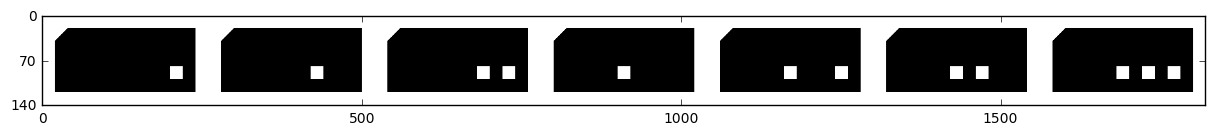

In [2]:
cinta = makeTape(1, 7)

plt.figure(figsize=(15, 5))
plt.imshow(cinta, cmap = plt.get_cmap('gray'))
plt.yticks([140, 70, 0])

In [3]:
cv2.imwrite("imgs/cinta.png", cinta)

True

## Contornos de la cinta

In [4]:
# Leo la cinta
# el 0 es para que carge la imagen en escala de grises
cinta = cv2.imread('imgs/cinta.png', 0)

([<matplotlib.axis.YTick at 0x7f6a0cc21a58>,
 <a list of 3 Text yticklabel objects>)

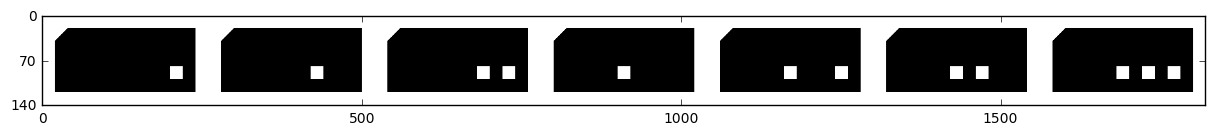

In [5]:
# Paso un threshold
# Esto va a ser util para despues separar la madera de la cinta
ret, thresh = cv2.threshold(cinta, 250, 255, 0)

plt.figure(figsize=(15, 5))
plt.imshow(thresh, cmap = plt.get_cmap('gray'))
plt.yticks(np.arange(140, -1, -70))

In [6]:
# Encuentro los contornos
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

len(contours), len(hierarchy[0])

(20, 20)

([], <a list of 0 Text yticklabel objects>)

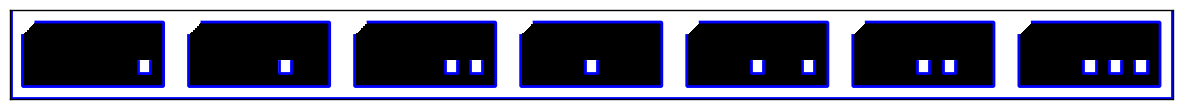

In [7]:
# Grafico la imagen y todos los contornos
plt.figure(figsize=(15, 5))
plt.imshow(cinta, interpolation='nearest', cmap=plt.cm.gray)

for contour in contours:    
    plt.plot(contour[:,0, :][:, 0], contour[:,0, :][:, 1], '-b', linewidth=2)

plt.axis('image')
plt.xticks([])
plt.yticks([])

## Conteo de elementos

3 red
2 green
2 black
1 c
2 y
1 m
1 k


([], <a list of 0 Text yticklabel objects>)

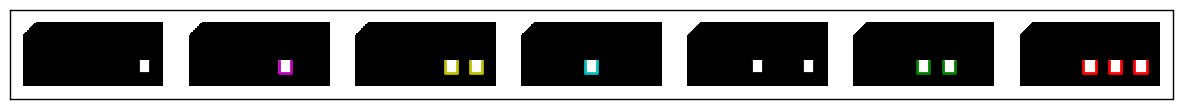

In [8]:
# Cuento la cantidad de cuadraditos blancos dentro de cada rectangulo
plt.figure(figsize=(15, 5))
plt.imshow(cinta, interpolation='nearest', cmap=plt.cm.gray)

colors = ['red', 'green', 'black', 'c', 'y', 'm', 'k']

# numero de contorno de todos los rectangulos
rectangles_number = set([val for val in hierarchy[0][:,-1] if val not in [-1, 0]])

for num, rectangle in enumerate(rectangles_number):
    
    # solo me quedo con los cuadrados que pertenecen a un rectangulo dado
    squares = [num for num, val in enumerate(hierarchy[0]) if val[-1] == rectangle]
    print(len(squares), colors[num])

    # plot
    for square in squares:
        plt.plot(contours[square][:,0, :][:, 0], contours[square][:,0, :][:, 1], colors[num], linewidth=2)

plt.axis('image')
plt.xticks([])
plt.yticks([])

## Reconociendo el codificado de un elemento

Decodificando de la imagen al valor en decimal

In [9]:
# Creo un solo elemento de la cinta
encode10 = decimal2encoding(10)
cv2.imwrite("imgs/code10.png", encode10)

code10 = cv2.imread('imgs/code10.png', 0)

In [10]:
# Leo la imagen y le calculo el contorno
ret, thresh = cv2.threshold(code10, 250, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
rect = cv2.minAreaRect(contours[0])
box = cv2.boxPoints(rect)

([<matplotlib.axis.XTick at 0x7f6a0cbe4908>,
 <a list of 12 Text xticklabel objects>)

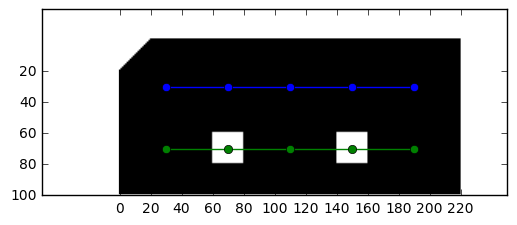

In [11]:
# Centro de los cuadrados

x_offset = 30
y_offset = 30
delta_x = 40
delta_y = 40
x = [x_offset+delta_x*i for i in range(5)]
y1 = [30 for i in range(len(x))]
y2 = [70 for i in range(len(x))]

# Plot
fig, ax = plt.subplots()
ax.imshow(code10, cmap = plt.get_cmap('gray'))

ax.plot(x, y1, '-o', x, y2, '-o')

plt.yticks(np.arange(100, 0, -20))
plt.xticks(np.arange(0, 240, 20))

In [12]:
# Codificacion binaria
binary = encoding2binary(code10, box)
binary

'0000001010'

### Rotando la imagen codificada

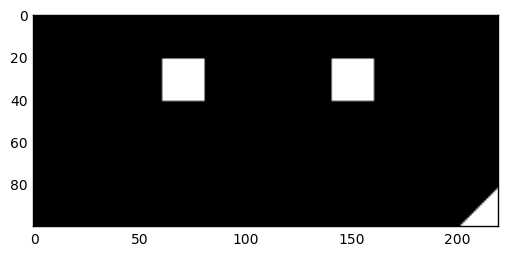

In [13]:
rows, cols = code10.shape

M = cv2.getRotationMatrix2D((cols/2, rows/2), 180, 1)
code10_rot = cv2.warpAffine(code10, M, (cols, rows))

fig, ax = plt.subplots()
ax.imshow(code10_rot, cmap = plt.get_cmap('gray'))

In [14]:
# Codificacion binaria de la imagen rotada
binary = encoding2binary(code10_rot, box)
binary

'0000001010'

## Codoficando toda la cinta

In [15]:
cinta = cv2.imread('imgs/cinta.png', 0)
ret, thresh = cv2.threshold(cinta, 250, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

([], <a list of 0 Text yticklabel objects>)

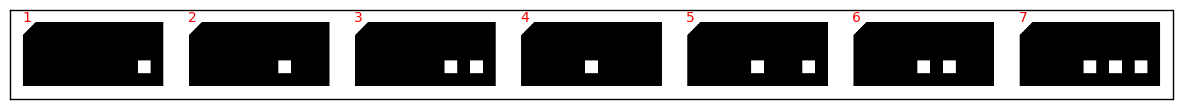

In [16]:
# numero de contorno de todos los rectangulos
rectangles_number = [num for num, val in enumerate(hierarchy[0]) if val[-1] == 0]

plt.figure(figsize=(15, 5))
plt.imshow(cinta, cmap = plt.get_cmap('gray'))

for num in rectangles_number:
    rect = cv2.minAreaRect(contours[num])
    box = cv2.boxPoints(rect)
    
    x_val = [int(min(box[:, 0])), int(max(box[:, 0]))]
    y_val = [int(min(box[:, 1])), int(max(box[:, 1]))]
    
    binario = encoding2binary(cinta[y_val[0]:y_val[1], x_val[0]:x_val[1]], box)
    plt.text(x_val[0], y_val[0], str(int(binario, 2)), color='red')
    
plt.axis('image')
plt.xticks([])
plt.yticks([])